# Plot SQG State and spectrum

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean

from sqgtools import XSQGTurb, SpectrumPlotter

In [2]:
plt.style.use("./rc-gfd.mplstyle")

In [3]:
fig_dir = "../figures"
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

In [4]:
ds = xr.open_zarr("/contrib/Tim.Smith/qgrc-teachers/sqg/resolution/temporal-sampling-064n/sqg.theta.0300dt.064n.864t.02z.64y.64x.zarr/")

In [5]:
def plot_slice(ax, xda, vmax, **kwargs):
    
    kw = {
        "x": "x",
        "levels": 100,
        "add_colorbar": False,
        "vmin": -vmax,
        "vmax": vmax,
        "cmap": "cmo.balance",
    }
    kw.update(kwargs)
    mappable = xda.plot.contourf(ax=ax, **kw)
    
    skw = {
        "ylabel": None,
        "xlabel": None,
        "title": None,
        "xticks": [],
        "yticks": [],
    }
    ax.set(**skw)
    for key in ["left", "right", "top", "bottom"]:
        ax.spines[key].set_visible(False)
    
    return mappable

In [9]:
# the time I'm showing snapshots at I guess
it = 453_152 + 2_073_600

In [10]:
xsqg = XSQGTurb()

In [11]:
theta = ds.theta.isel(time=it)

In [12]:
kespec = xsqg.calc_kespec1d(theta.T.load())

In [13]:
ideal = lambda k : k**(-5/3)

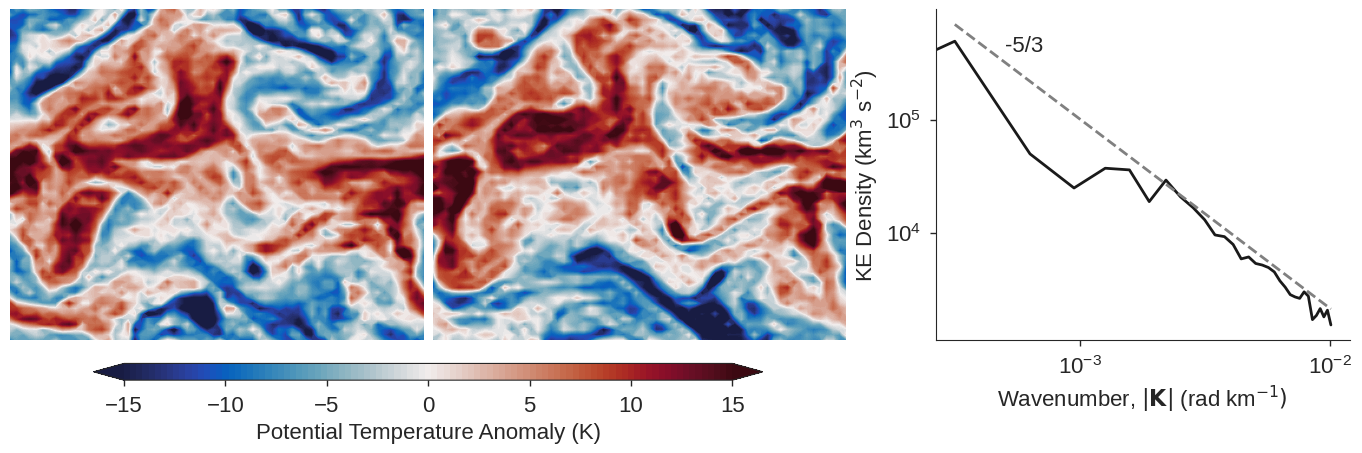

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(4.5*3, 4.5), constrained_layout=True)

vmax = 15
for zlev, ax in enumerate(axs[:-1]):
    mappable = plot_slice(ax=ax, xda=ds.theta.isel(time=it, z=zlev), vmax=vmax)
    
fig.colorbar(
    mappable,
    ax=axs[:-1],
    orientation="horizontal",
    label="Potential Temperature Anomaly (K)",
    pad=-.12,
    aspect=40,
    shrink=0.8,
    ticks=np.linspace(-vmax, vmax, 7),
)
    

ax = axs[-1]
kespec.plot(
    ax=ax,
    xscale="log",
    yscale="log",
    color="k",
)
ideal(kespec.k1d[1:]).plot(
    ax=ax,
    color="gray",
    linestyle="--"
)
ax.text(5e-4, 4e5, "-5/3")

ax.set(ylabel="KE Density (km$^3$ s$^{-2}$)", xlabel=r"Wavenumber, $|\mathbf{K}|$ (rad km$^{-1})$", title="")
fig.savefig(f"{fig_dir}/sqg_reference_plot.jpg", bbox_inches="tight", dpi=300)